In [1]:
'''This is JP Morgan Forage Virtual Internship Exercise - 1 . Try to visualize the data to find patterns and consider what 
factors might cause the price of natural gas to vary. 
This can include looking at months of the year for seasonal trends that affect the prices, but market holidays, 
weekends, and bank holidays need not be accounted for. 
Analyze the data to estimate the purchase price of gas at any date in the past and extrapolate it for one year into the future. 
Your code should take a date as input and return a price estimate'''
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import datetime

In [13]:


data=pd.read_csv('E:\\Shirin Gangal\\Python\\Python_learning\\Udemy ML\\Nat_Gas.csv')
#df=pd.read_csv('D:\\Shireen\\Python\\Python_learning\\Udem ML\\wt-ht-data.csv')

In [14]:
def date_to_ordinal(date):
    return date.toordinal()

In [15]:

data['Dates'] = pd.to_datetime(data['Dates'])  # Ensure 'Date' is in datetime format


C:\Users\Welcome\AppData\Local\Temp\ipykernel_11628\3717680123.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dates'] = pd.to_datetime(data['Dates'])  # Ensure 'Date' is in datetime format


In [16]:
data['OrdinalDate'] = data['Dates'].apply(date_to_ordinal)

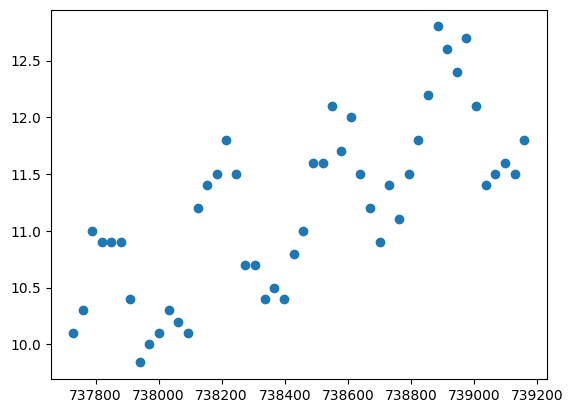

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(data['OrdinalDate'],data['Prices'])

In [19]:
# Seasonal change in gas prices:
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
    
data['Season'] = data['Dates'].apply(get_season)

# Extract year and month to help analyze by season
data['Year'] = data['Dates'].dt.year
data['Month'] = data['Dates'].dt.month

In [22]:
seasonal_avg_prices = data.groupby(['Year', 'Season'])['Prices'].mean().reset_index()
print(seasonal_avg_prices)

    Year  Season     Prices
0   2020    Fall  10.200000
1   2020  Winter  11.000000
2   2021    Fall  10.500000
3   2021  Spring  10.380000
4   2021  Summer  10.133333
5   2021  Winter  11.066667
6   2022    Fall  11.133333
7   2022  Spring  10.966667
8   2022  Summer  10.433333
9   2022  Winter  11.633333
10  2023    Fall  11.833333
11  2023  Spring  11.566667
12  2023  Summer  11.133333
13  2023  Winter  12.200000
14  2024    Fall  11.800000
15  2024  Spring  12.066667
16  2024  Summer  11.533333
17  2024  Winter  12.500000


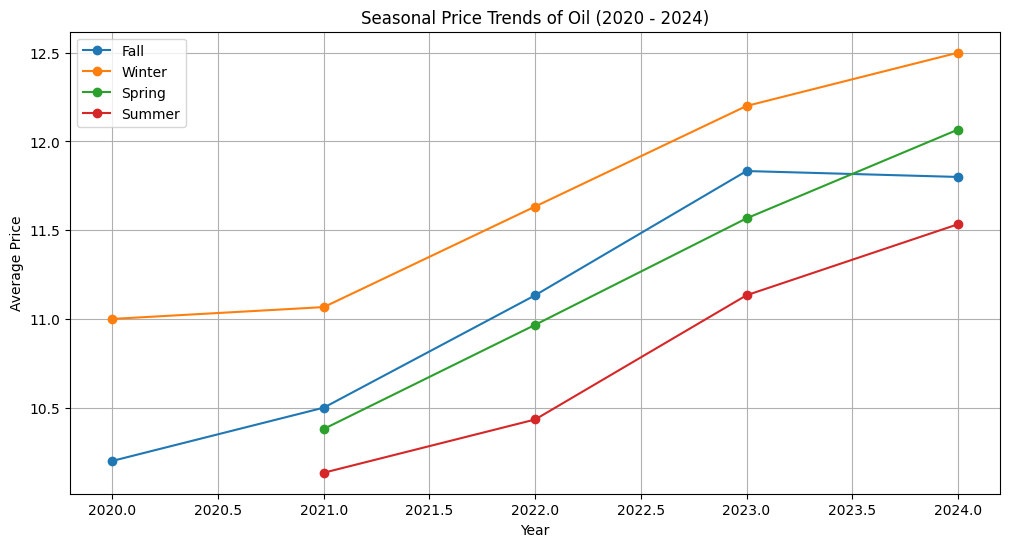

In [24]:
seasonal_avg_prices = data.groupby(['Year', 'Season'])['Prices'].mean().reset_index()

# Plotting the seasonal price trends for visual analysis
plt.figure(figsize=(12, 6))

for season in seasonal_avg_prices['Season'].unique():
    seasonal_data = seasonal_avg_prices[seasonal_avg_prices['Season'] == season]
   # print(seasonal_data)
    plt.plot(seasonal_data['Year'], seasonal_data['Prices'], label=season, marker='o')

plt.title("Seasonal Price Trends of Oil (2020 - 2024)")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.legend()
plt.grid(True)
plt.show()



In [25]:
# Optional: Calculate the average price per season over all years to see overall trends
average_price_per_season = seasonal_avg_prices.groupby('Season')['Prices'].mean().reset_index()
print(average_price_per_season)

   Season     Prices
0    Fall  11.093333
1  Spring  11.245000
2  Summer  10.808333
3  Winter  11.680000


In [26]:
X = data[['OrdinalDate']]  # Features: ordinal date
y = data['Prices']  # Target: price
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [27]:
date_input = input("Enter a date (YYYY-MM-DD) to estimate the price: ")
input_date = pd.to_datetime(date_input)
input_ordinal = input_date.toordinal()

predicted_price = model.predict([[input_ordinal]])

# Print the estimated price
print(f"The estimated price for {date_input} is: ${predicted_price[0]:.2f}")

Enter a date (YYYY-MM-DD) to estimate the price:  2025-02-01


The estimated price for 2025-02-01 is: $12.28


C:\Users\Welcome\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


C:\Users\Welcome\AppData\Local\Temp\ipykernel_11628\3167770664.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_time = pd.to_datetime(date_time)


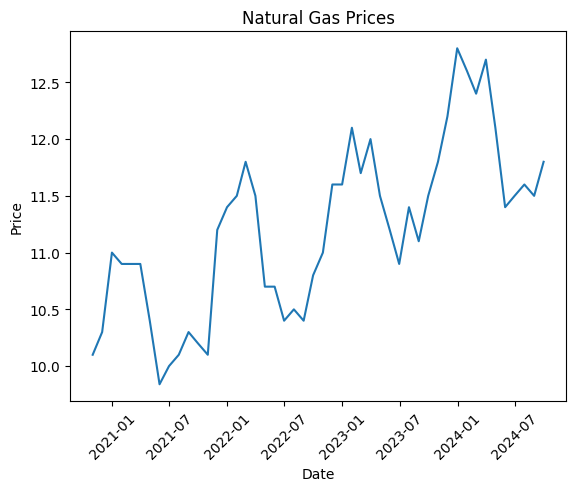

In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import date, timedelta

date_time = ["10-2020", "11-2020", "12-2020"]
date_time = pd.to_datetime(date_time)
#data = [1, 2, 3]

#data = pd.read_csv('natgas_R.csv', parse_dates=['Dates'])
prices = data['Prices'].values
dates = data['Dates'].values

# plot prices against dates
fig, ax = plt.subplots()
ax.plot_date(dates, prices, '-')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Natural Gas Prices')
ax.tick_params(axis='x', rotation=45)

plt.show()
